# Individueel Labo 2 - opgave
ML modellen (2u45)

Deze opgave bestaat uit volgende onderdelen: 
- deel 1 : data preparatie (4ptn)
- deel 2 : feature selection (4ptn)
- deel 3 : opstellen leermodellen (10ptn)
- deel 4 : evaluatie leermodellen (2ptn)

Je voert deze onderdelen in principe in volgorde uit. Zit je toch vast bij een bepaald deel, dan kan je meestal wel nog iets zinvols demonstreren in een volgend deel. 

Op sommige plaatsen staat een 🟢. Hier zal je uitleg moeten geven. Je zal dus in markdown tekst moeten typen om het gevraagde toe te lichten. 

In [6]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## deel 1 : data preparatie (4ptn)

### 1.1 Inlezen data
De data waar we mee gaan werken zit in twee bestanden. Er is een bestand met data over de energiemetingen per dag. En er is een bestand met informatie over het weer per dag. 

#### Energie data
* energiedata vind je in EnergieData.csv. In dit bestand zitten meetwaarden van een digitale meter en geproduceerde zonne-energie, per dag
    * Afname Dag: De afname van die dag van het net tijdens de piekuren
    * Afname Nacht: De afname van die dag van het net tijdens de daluren
    * Injectie Dag: De injectie van die dag naar het net tijdens de piekuren
    * Injectie Nacht: De injectie van die dag naar het net tijdens de daluren
    * zon: de opgewekte zonne-energie van die dag
    
De eerste lijnen zien er zo uit: 

>`datum;Afname Dag;Afname Nacht;Injectie Dag;Injectie Nacht;zon
26/10/2021;0;0;0;0;10,6
27/10/2021;36,195;8,22;0,348;0;10,1
28/10/2021;15,404;14,346;10,975;0;19,9`
    
* Lees het bestand in als een pandas dataframe. 
* Zet alle kolommen om naar een geschikt datatype. <br>_Tip: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html_
* Geef een overzicht van de kolommen en hun datatypes.

In [7]:
energieData = pd.read_csv('EnergieData.csv', names=['datum','Afname Dag','Afname Nacht','Injectie Dag','Injectie Nacht','zon'], sep=";", skiprows=1)
temp = pd.to_datetime(energieData['datum'])
energieData['datum']=temp
energieData = energieData.convert_dtypes()

#unable to parse string "36,195" omdat er een ',' staat dit zou moeten een '.' zijn
temp = energieData['Afname Dag'].replace(",",".").astype(float)
print(temp.dtypes)

C:\Users\Guest\AppData\Local\Temp/ipykernel_10556/2576097877.py:2: UserWarning: Parsing '26/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  temp = pd.to_datetime(energieData['datum'])
C:\Users\Guest\AppData\Local\Temp/ipykernel_10556/2576097877.py:2: UserWarning: Parsing '27/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  temp = pd.to_datetime(energieData['datum'])
C:\Users\Guest\AppData\Local\Temp/ipykernel_10556/2576097877.py:2: UserWarning: Parsing '28/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  temp = pd.to_datetime(energieData['datum'])
C:\Users\Guest\AppData\Local\Temp/ipykernel_10556/2576097877.py:2: UserWarning: Parsing '29/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  temp = pd.to_datetime(energieData['datum'])
C:\Users\Guest\A

ValueError: could not convert string to float: '36,195'

#### Weer data
Weerdata vind je in weer_meteostat.csv. In dit bestand zit gemeten data ivm het weer, per dag.

| **Kolom** | **Beschrijving**                                                                     |
|:-----------|:------------------------------------------------------------------------------------|
| time       | The date                                                                            |
| tavg       | The average air temperature in _°C_                                                 |
| tmin       | The minimum air temperature in _°C_                                                 |
| tmax       | The maximum air temperature in _°C_                                                 |
| prcp       | The daily precipitation total in _mm_                                               |
| snow       | The snow depth in _mm_                                                              |
| wdir       | The average wind direction in degrees (_°_)                                         |
| wspd       | The average wind speed in _km/h_                                                    |
| wpgt       | The peak wind gust in _km/h_                                                        |
| pres       | The average sea-level air pressure in _hPa_                                         |
| tsun       | The daily sunshine total in minutes (_m_)                                           |

De eerste lijnen zien er zo uit: 

>`time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
2021-10-26,12.5,10.8,14.6,0.6,,215.0,13.9,27.8,1020.0,
2021-10-27,14.0,12.7,16.3,0.0,,205.0,13.9,31.5,1022.1,
2021-10-28,13.0,10.5,16.2,0.0,,171.0,11.6,33.3,1015.2,`

* Lees het bestand in als een pandas dataframe. 
* Zet alle kolommen om naar een geschikt datatype. 
* Geef een overzicht van 5 willekeurige (random) dagen uit de dataset. 

In [ ]:
weerData = pd.read_csv('weer_meteostat.csv', names=['time','tavg','tmin','tmax','prcp','snow','wdir','wspd','wpgt','pres','tsun'], sep=",", skiprows=1)
temp = pd.to_datetime(weerData['time'])
weerData['time']=temp
print(weerData.info())
weerData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    205 non-null    datetime64[ns]
 1   tavg    204 non-null    float64       
 2   tmin    204 non-null    float64       
 3   tmax    204 non-null    float64       
 4   prcp    204 non-null    float64       
 5   snow    0 non-null      float64       
 6   wdir    204 non-null    float64       
 7   wspd    204 non-null    float64       
 8   wpgt    204 non-null    float64       
 9   pres    204 non-null    float64       
 10  tsun    0 non-null      float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 17.7 KB
None


,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-10-26,12.5,10.8,14.6,0.6,NaN,215.0,13.9,27.8,1020.0,NaN
1,2021-10-27,14.0,12.7,16.3,0.0,NaN,205.0,13.9,31.5,1022.1,NaN
2,2021-10-28,13.0,10.5,16.2,0.0,NaN,171.0,11.6,33.3,1015.2,NaN
3,2021-10-29,13.9,11.9,16.9,2.6,NaN,174.0,15.1,44.5,1005.6,NaN
4,2021-10-30,13.1,12.3,14.2,8.6,NaN,170.0,12.4,33.3,1001.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
200,2022-05-14,15.8,10.6,21.8,0.0,NaN,265.0,9.6,22.2,1021.8,NaN
201,2022-05-15,20.3,12.4,28.8,0.0,NaN,81.0,9.2,31.5,1017.5,NaN
202,2022-05-16,20.7,18.4,22.9,0.0,NaN,221.0,13.7,35.2,1015.8,NaN
203,2022-05-17,21.2,16.5,26.5,0.0,NaN,229.0,7.5,25.9,1019.8,NaN


Ga op zoek naar kolommen zonder waarden en verwijder deze. 

In [ ]:
weerData = weerData.drop(columns=['snow','tsun'])
## met filter kijken of NaN en dan droppen
#test = weerData[weerData.isna().any(axis=1)]
#test

### 1.2 Samenstellen data en afleiden extra features
- Voeg de twee databronnen samen tot één grote dataframe.

In [ ]:
data = pd.merge(weerData,energieData, left_on='time', right_on='datum')
data = data.drop(columns='datum')
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            150 non-null    datetime64[ns]
 1   tavg            149 non-null    float64       
 2   tmin            149 non-null    float64       
 3   tmax            149 non-null    float64       
 4   prcp            149 non-null    float64       
 5   wdir            149 non-null    float64       
 6   wspd            149 non-null    float64       
 7   wpgt            149 non-null    float64       
 8   pres            149 non-null    float64       
 9   Afname Dag      150 non-null    string        
 10  Afname Nacht    150 non-null    string        
 11  Injectie Dag    150 non-null    string        
 12  Injectie Nacht  150 non-null    string        
 13  zon             150 non-null    string        
dtypes: datetime64[ns](1), float64(8), string(5)
memory usage: 

,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht,zon
0,2021-10-26,12.5,10.8,14.6,0.6,215.0,13.9,27.8,1020.0,0,0,0,0,"10,6"
1,2021-10-27,14.0,12.7,16.3,0.0,205.0,13.9,31.5,1022.1,"36,195","8,22","0,348",0,"10,1"
2,2021-10-28,13.0,10.5,16.2,0.0,171.0,11.6,33.3,1015.2,"15,404","14,346","10,975",0,"19,9"
3,2021-10-29,13.9,11.9,16.9,2.6,174.0,15.1,44.5,1005.6,"9,961","9,901","6,316",0,"10,8"
4,2021-10-30,13.1,12.3,14.2,8.6,170.0,12.4,33.3,1001.3,0,"17,235",0,"0,113","1,2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-05-14,15.8,10.6,21.8,0.0,265.0,9.6,22.2,1021.8,0,"14,104",0,"20,362","27,2"
146,2022-05-15,20.3,12.4,28.8,0.0,81.0,9.2,31.5,1017.5,0,"3,862",0,"22,579","25,8"
147,2022-05-16,20.7,18.4,22.9,0.0,221.0,13.7,35.2,1015.8,"12,876","4,916","7,583",0,"14,9"
148,2022-05-17,21.2,16.5,26.5,0.0,229.0,7.5,25.9,1019.8,"5,399","9,58","19,108",0,"24,2"


* Verwijder dagen waarvan geen weerinfo bekend is

In [ ]:
mask = data['tavg'].isnull()
print(mask)
data[mask].drop(columns=['time','tavg','tmin','tmax','prcp','wdir','wspd','wpgt','pres','Afname Dag','Afname Nacht','Injectie Dag','Injectie Nacht','zon'])
data

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: tavg, Length: 150, dtype: bool


,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht,zon
0,2021-10-26,12.5,10.8,14.6,0.6,215.0,13.9,27.8,1020.0,0,0,0,0,"10,6"
1,2021-10-27,14.0,12.7,16.3,0.0,205.0,13.9,31.5,1022.1,"36,195","8,22","0,348",0,"10,1"
2,2021-10-28,13.0,10.5,16.2,0.0,171.0,11.6,33.3,1015.2,"15,404","14,346","10,975",0,"19,9"
3,2021-10-29,13.9,11.9,16.9,2.6,174.0,15.1,44.5,1005.6,"9,961","9,901","6,316",0,"10,8"
4,2021-10-30,13.1,12.3,14.2,8.6,170.0,12.4,33.3,1001.3,0,"17,235",0,"0,113","1,2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-05-14,15.8,10.6,21.8,0.0,265.0,9.6,22.2,1021.8,0,"14,104",0,"20,362","27,2"
146,2022-05-15,20.3,12.4,28.8,0.0,81.0,9.2,31.5,1017.5,0,"3,862",0,"22,579","25,8"
147,2022-05-16,20.7,18.4,22.9,0.0,221.0,13.7,35.2,1015.8,"12,876","4,916","7,583",0,"14,9"
148,2022-05-17,21.2,16.5,26.5,0.0,229.0,7.5,25.9,1019.8,"5,399","9,58","19,108",0,"24,2"


- Bereken op basis van de datum minstens 2 nuttige getallen die je als feature zou kunnen gebruiken. 

In [ ]:
#bron: https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components


- Teken een grafiek van de minimum temperatuur en maximum temperatuur over de tijd. 

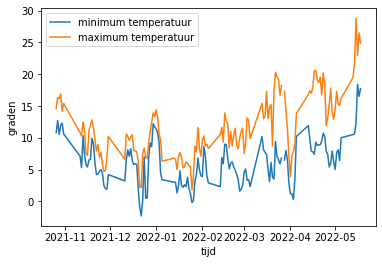

In [ ]:
ax1 = plt.subplot()
ax1.plot(data['time'],data['tmin'], label = 'minimum temperatuur')
ax1.plot(data['time'],data['tmax'], label='maximum temperatuur')
ax1.set_xlabel('tijd')
ax1.set_ylabel('graden')
ax1.legend()

## deel 2 : feature selection (4ptn)

Verwijder eerst kolommen die feature noch target zijn. De energiedata die we niet gaan voorspellen mogen we niet als feature gebruiken en dienen we dus zeker eerst te verwijderen.
>'datum','Afname Dag','Afname Nacht', 'Injectie Dag', 'Injectie Nacht'

In [ ]:
data = data.drop(columns=['Afname Dag','Afname Nacht','Injectie Dag','Injectie Nacht'])

In [ ]:
data

,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,zon
0,2021-10-26,12.5,10.8,14.6,0.6,215.0,13.9,27.8,1020.0,"10,6"
1,2021-10-27,14.0,12.7,16.3,0.0,205.0,13.9,31.5,1022.1,"10,1"
2,2021-10-28,13.0,10.5,16.2,0.0,171.0,11.6,33.3,1015.2,"19,9"
3,2021-10-29,13.9,11.9,16.9,2.6,174.0,15.1,44.5,1005.6,"10,8"
4,2021-10-30,13.1,12.3,14.2,8.6,170.0,12.4,33.3,1001.3,"1,2"
...,...,...,...,...,...,...,...,...,...,...
145,2022-05-14,15.8,10.6,21.8,0.0,265.0,9.6,22.2,1021.8,"27,2"
146,2022-05-15,20.3,12.4,28.8,0.0,81.0,9.2,31.5,1017.5,"25,8"
147,2022-05-16,20.7,18.4,22.9,0.0,221.0,13.7,35.2,1015.8,"14,9"
148,2022-05-17,21.2,16.5,26.5,0.0,229.0,7.5,25.9,1019.8,"24,2"


### 2.1 Voorspellen van het nut van features
- Stel een correlatie matrix op voor de features en target<br>
Met volgende toevoeging kan je deze een kleur geven en kan je sneller de antwoorden vinden op volgende vragen: 
>`<correlatiematrix hier>.style.background_gradient(cmap='coolwarm')`

In [ ]:
np.corrcoef(data)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

- Verwijder twee features die op basis van deze correlatiematrix het minst geschikt zijn om de geproduceerde zonne-energie te voorspellen.

- Verwijder twee features die op basis van deze correlatiematrix sterk gerelateerd zijn aan een andere feature waardoor het weinig nuttig is om beide features te behouden. 

### 2.2 Features en target

Maak het onderscheid tussen features en target. 
En maak de verdeling tussen trainings- en testdata. Gebruik een testset van 30%. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(data.iloc[:,1:9],data.iloc[:,9:], test_size=0.30)

features = data.iloc[:,1:9]
target = data.iloc[:,9:10]

print(features)

NameError: name 'data' is not defined

## deel 3 : opstellen leermodellen (10ptn)

In [ ]:
#imports
from sklearn.preprocessing import RobustScaler

### 3.1 Normalisatie van data

Toon een boxplot van de features van je trainingsset, vóór de normalisatie. 

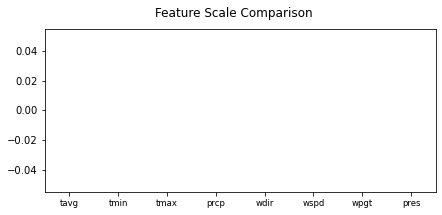

In [ ]:

names = features.columns

def featureBoxPlot(X, names, title):
    plt.rcParams["figure.figsize"] = [7,3]
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot()
    plt.boxplot(X, showmeans=True)
    ax.set_xticklabels(names, fontsize = 8.5)
    plt.show()
    return

featureBoxPlot(features.values, names,"Feature Scale Comparison")
#omdat alle waarden een string type hebben werkt dit niet

Normaliseer je features met een _RobustScaler_ en geef deze opnieuw weer in een boxplot. 

Normaliseer ook je features van je testset. 

In [ ]:
print(X_train)
transformer = RobustScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
print(X_train_scaled)

     tavg  tmin  tmax  prcp   wdir  wspd  wpgt    pres
109  11.2   5.9  16.7   0.0   24.0   8.0  25.9  1030.6
18    6.3   4.3   8.9   0.3  301.0   4.7  11.1  1030.8
129  14.1   8.9  19.5   0.0   58.0  11.0  33.3  1012.1
60    4.0   2.3   6.2   0.8  292.0  10.3  25.9  1035.8
40    4.0   0.5   6.9   7.2   68.0  11.5  27.8  1005.5
..    ...   ...   ...   ...    ...   ...   ...     ...
15   10.1   9.1  11.5   0.3  218.0  10.0  22.2  1024.9
112  11.3   6.5  17.3   0.0    2.0   6.5  20.4  1023.9
83    8.9   6.0  11.0   7.3  231.0  28.9  66.7  1006.7
94    7.5   3.3  13.1   0.0   95.0   8.7  22.2  1017.6
59    4.3   2.6   5.4   1.1  313.0  13.4  33.3  1030.7

[105 rows x 8 columns]


NameError: name 'RobustScaler' is not defined

### 3.2 KNN
Stel een KNN model op om de geproduceerde zonne-energie te voorspellen op basis van 3 buren. Doe dit eenmaal op de ongeschaalde data en een tweede keer op de geschaalde data. Vergelijk hoe goed beide modellen presteren aan de hand van minstens 1 metriek. 

##### Eenvoudige enkele fit, zonder scaling, met KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

NameError: name 'X_train' is not defined

##### Eenvoudige enkele fit, met scaling, met KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Geef toelichting bij je resultaten hierboven. 

> 🟢 Door te scalen zijn de afstanden tussen features kleiner en dus makkelijker/precieser te vergelijken. Een algoritme kan dan met deze data beter presteren

Dankzij scaling werd onze fout kleiner. We kunnen dus duidelijk beter voorspellen. 

### 3.3 Decision Tree
Stel een Decision Tree model op om de geproduceerde zonne-energie te voorspellen. Neem _min_samples_split=0.19_. Neem voor de andere parameters eerst waarden naar keuze en nadien de beste waarden uit volgende vraag. 

Teken de gevormde boom. 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

dtf = DecisionTreeRegressor(random_state= 0, max_depth=5, min_samples_split=0.19)
dtf.fit(X_train,y_train)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize= (4,4), dpi=300)
tree.plot_tree(dtf, feature_names = features, class_names= target, filled= True)
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### 3.4 Parameter tuning

Voer nu voor beide modellen (KNN en Decision Tree) parameter tuning uit. Maak gebruik van de ingebouwde manier van _sklearn_ om _grid search_ toe te passen, gecombineerd met _cross validatie_. Gebruik hiervoor enkel je trainingsdata. Geef voor beide modellen: 
- De beste parameters
- De gemiddelde cross validatie score van het model met deze beste parameters
- De score van dit beste model op de volledige trainingsset
- De score van dit beste model op de ongeziene testset

Geef de scores weer als tekst en nadien ook als een bar chart. 

In [ ]:
testlist = [0,1,2,3,4,5,6,7]
dummyScore = 0
bestParameter = 0

for i in testlist:
    dtf = DecisionTreeRegressor(random_state= 0, max_depth=i)
    dtf.fit(X_train,y_train)
    if (dtf.score(X_train, y_train) > dummyScore):
        dummyScore = dtf.score(X_train, y_train)
        bestParameter = i
        
print("Beste Parameter voor max_depth: {:.3f}".format(bestParameter))

dtfBest = DecisionTreeRegressor(random_state= 0, max_depth=bestParameter)
cv_results = cross_validate(dtf,X_train,y_train, cv=3)
print(cv_results)

print("Accuracy on training set: {:.3f}".format(dtfBest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtfBest.score(X_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
testlist = [0,1,2,3,4,5,6,7]
dummyScore = 0
bestParameter = 0

for i in testlist:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    if (dtf.score(X_train, y_train) > dummyScore):
        dummyScore = knn.score(X_train, y_train)
        bestParameter = i
        
print("Beste Parameter voor max_depth: {:.3f}".format(bestParameter))

knnBest = KNeighborsRegressor(n_neighbors=bestParameter)
cv_results = cross_validate(knn,X_train,y_train, cv=3)
print(cv_results)

print("Accuracy on training set: {:.3f}".format(knnBest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knnBest.score(X_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## deel 4 : evaluatie leermodellen (2ptn)

Beide modellen geven je 3 scores: 
* De gemiddelde cross validatie score van het model met deze beste parameters
* De score van dit beste model op de volledige trainingsset
* De score van dit beste model op de ongeziene testset

Vergelijk de scores per model en vergelijk de twee modellen onderling. Toon aan dat je begrijpt wat deze scores betekenen. Kan je de relatie tussen deze scores verklaren? 

Welk model werkt het best? Kan je dit verklaren? 

_Opmerking: dit deel staat op 2 van de 20 punten, geef dus voldoende uitleg. Probeer voldoende technische termen in je uitleg te verwerken._

> 🟢 definitie scores:   
> * cross validatie:  
    Weergeeft een score bekomen door meerdere malen een model te bouwen.  
    De test data wordt telkens opnieuw opgeslplits.  
    Er wordt dus meerdere malen een score gemaakt met verschillende testsets entrainingsets  
> * score trainingsset  
    weergeeft de score die bekomen wordt door het model te testen op de data waarop hij getraint was.  
> * score testset  
    weergeeft een score die bekomen werdt op een set data die de machine nog nooit gezien had tijdens het trainen.
> Wat is score?
    score is het percentage van juiste predictions dat het model maakte
    een score van 1 wilt dus zeggen dat het model alles juist heeft geraden op deze dataset.
> wat zegt elke score?
> * cross validatie:  
    Geeft een goede representatie van hoe goed het model is.  
    De vele keren splitsen zorgt dat de splitsing dus geen grote impact heeft op de score.  
    Wat op andere manier wel is. (dit door extreme waarden die het model zouden kunnen beinvloeden of de test) 
> * score trainingsset  
    Bij een hoge score op deze test zal er waarschijnlijk overfitting gebeurd zijn.
> * score testset  
    Deze waarde wil je zo hoog mogelijk hebben aangezien het aantoont hoe goed je model het doet op ongeziene data.  
    let op de split van test en train kan hier een grote invloed op hebben.
    
 

Doordat mijn datatype op string staat en niet een float is werkt mijn testen niet.  
De verwachtingen zouden zijn dat de decision tree iets beter presteerd.  
Hij kan beter difirentieren tussen wat zijn belangrijke en minder belangrijke features.  
Dit door de vershillende beslissingen die telkens komen.  
Hoe verder features dus voorkomen in de tree hoe minder impact ze zullen hebben.  
Bij een goede tree kan er dus minder belangrijkefeatures in act genomen worden.  
De Knn kijkt enkel naar de afstand tussen de features wat het onderscheid van features minder goed kan.